# Forecasting with RNN

In [216]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
import numpy as np
from matplotlib import pyplot as plt

In [217]:
elect = pd.read_csv("../datasets/Brutos_Nov24.csv", sep=";", decimal=",", encoding="latin1", skiprows=3)

In [218]:
elect

,Grupo,OTR_PRI,OTR_PRI.1,OTR_PRI.2,OTR_EXTR,OTR_EXTR.1,OTR_EXTR.2,OTR_EXTR.3,OTR_EXTR.4,INDUS_CONS,...,SERVICIOS.1,SERVICIOS.2,SERVICIOS.3,SERVICIOS.4,SERVICIOS.5,SERVICIOS.6,OTRAS,OTRAS.1,OTRAS.2,OTRAS.3
0,2009M01,71.500,89.561,93.980,112.508,96.576,73.025,101.361,112.618,95.447,...,93.672,92.238,70.071,91.812,86.334,80.719,88.450,63.101,80.241,54.731
1,2009M02,66.906,97.601,90.825,104.573,99.618,63.657,101.949,105.099,92.702,...,87.319,85.809,67.656,87.136,82.527,77.289,89.148,60.366,79.948,54.880
2,2009M03,81.998,81.718,106.177,116.323,100.213,73.882,106.920,101.379,97.975,...,99.985,95.436,76.957,96.320,90.406,84.094,98.445,78.073,88.738,70.522
3,2009M04,84.393,83.460,100.582,107.272,94.541,75.740,99.548,97.667,92.805,...,92.024,92.319,81.797,90.556,87.010,83.043,94.973,82.041,81.113,75.690
4,2009M05,142.424,115.718,101.205,105.443,99.496,99.898,104.157,106.448,103.246,...,96.283,100.107,99.421,97.872,97.789,95.307,102.657,100.039,96.989,125.381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2024M07,134.022,158.838,74.445,76.539,142.610,417.623,132.273,78.701,121.514,...,148.893,110.232,165.680,74.268,117.298,163.082,132.916,216.526,143.120,242.157
187,2024M08,141.620,224.880,76.622,47.514,81.010,417.098,114.968,50.464,125.830,...,145.118,106.691,178.897,70.028,113.873,158.280,119.161,224.208,141.749,256.213
188,2024M09,99.311,199.796,69.763,61.913,140.231,409.944,132.320,85.054,121.116,...,137.571,101.423,135.729,64.253,103.787,136.254,129.944,191.960,128.795,182.556
189,2024M10,84.723,246.553,71.682,70.472,151.560,367.452,143.219,94.324,124.963,...,143.045,104.103,114.366,65.242,103.680,131.285,131.568,180.175,135.583,158.301


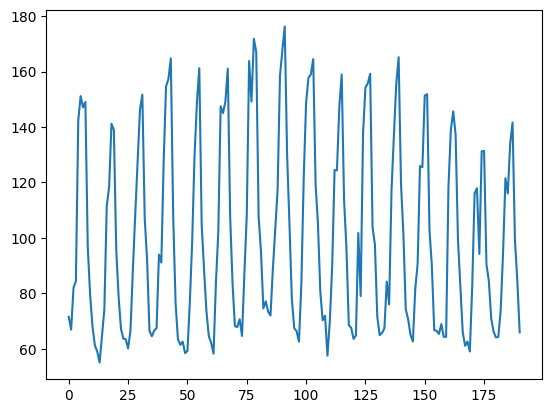

In [219]:
plt.plot(elect["OTR_PRI"])
scaled = (elect["OTR_PRI"]/elect["OTR_PRI"].max()).values

In [220]:
scaled

array([0.40556331, 0.37950516, 0.46511021, 0.47869516, 0.80785942,
       0.85743457, 0.83439404, 0.84551725, 0.54892852, 0.45053829,
       0.38590909, 0.34720757, 0.33454151, 0.31214761, 0.36607335,
       0.42125832, 0.63264473, 0.67122713, 0.80083155, 0.7880407 ,
       0.54361933, 0.44661879, 0.3808438 , 0.36105344, 0.35985093,
       0.34078662, 0.37724194, 0.50093592, 0.614176  , 0.71997413,
       0.82961803, 0.86040114, 0.6079082 , 0.52248466, 0.37700938,
       0.36580109, 0.37735539, 0.38263622, 0.53301229, 0.51667064,
       0.72633269, 0.87742913, 0.89246617, 0.93467878, 0.61194115,
       0.43457668, 0.35977152, 0.3481605 , 0.3548367 , 0.33126865,
       0.3356873 , 0.43320401, 0.55955258, 0.73637818, 0.84427503,
       0.91447436, 0.59504929, 0.50242204, 0.41769617, 0.36637398,
       0.35241466, 0.33015689, 0.47468491, 0.57848075, 0.83658918,
       0.82262987, 0.84650989, 0.91383907, 0.61245164, 0.47497419,
       0.38655005, 0.3846612 , 0.40077596, 0.36641369, 0.49350

In [221]:
def get_slices(data, size):
    data = np.asarray(data)
    return np.lib.stride_tricks.sliding_window_view(data, size)[:-1]

In [222]:
slices = get_slices(scaled, 10)

In [223]:
slices

array([[0.40556331, 0.37950516, 0.46511021, ..., 0.84551725, 0.54892852,
        0.45053829],
       [0.37950516, 0.46511021, 0.47869516, ..., 0.54892852, 0.45053829,
        0.38590909],
       [0.46511021, 0.47869516, 0.80785942, ..., 0.45053829, 0.38590909,
        0.34720757],
       ...,
       [0.40281228, 0.37539847, 0.3634925 , ..., 0.658147  , 0.76020148,
        0.80329896],
       [0.37539847, 0.3634925 , 0.36429228, ..., 0.76020148, 0.80329896,
        0.56331325],
       [0.3634925 , 0.36429228, 0.41898944, ..., 0.80329896, 0.56331325,
        0.48056699]])

In [224]:
y = [slices[i + 1][-1] for i in range(len(slices) - 1)]

In [225]:
y = np.array(y)

In [226]:
y

array([0.38590909, 0.34720757, 0.33454151, 0.31214761, 0.36607335,
       0.42125832, 0.63264473, 0.67122713, 0.80083155, 0.7880407 ,
       0.54361933, 0.44661879, 0.3808438 , 0.36105344, 0.35985093,
       0.34078662, 0.37724194, 0.50093592, 0.614176  , 0.71997413,
       0.82961803, 0.86040114, 0.6079082 , 0.52248466, 0.37700938,
       0.36580109, 0.37735539, 0.38263622, 0.53301229, 0.51667064,
       0.72633269, 0.87742913, 0.89246617, 0.93467878, 0.61194115,
       0.43457668, 0.35977152, 0.3481605 , 0.3548367 , 0.33126865,
       0.3356873 , 0.43320401, 0.55955258, 0.73637818, 0.84427503,
       0.91447436, 0.59504929, 0.50242204, 0.41769617, 0.36637398,
       0.35241466, 0.33015689, 0.47468491, 0.57848075, 0.83658918,
       0.82262987, 0.84650989, 0.91383907, 0.61245164, 0.47497419,
       0.38655005, 0.3846612 , 0.40077596, 0.36641369, 0.49350531,
       0.61279765, 0.92936392, 0.84647585, 0.97486075, 0.9474753 ,
       0.61080103, 0.53841223, 0.42281251, 0.43734472, 0.41645

In [227]:
x = slices[:-1]
x = np.reshape(x, (x.shape[0], 1, x.shape[1])) 

(180, 10)

In [228]:
x1 = slices[:-1]
x1 = x1.reshape(x1.shape[0], 1, x1.shape[1])
x1.shape

(180, 1, 10)

In [229]:
x2 = slices[:-1]
x2 = x2.reshape(x2.shape[0], x2.shape[1], 1)
x2.shape

(180, 10, 1)

In [230]:
model = Sequential([
    LSTM(4, input_shape=(1, 10)),
    Dense(1)
])

model.compile(loss='mse', metrics=['mae'])
model.fit(x1, y, epochs=100, validation_split=0.2)

Epoch 1/100


/home/pedro/ESESA/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.2309 - mae: 0.4262 - val_loss: 0.1569 - val_mae: 0.3515
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1977 - mae: 0.3824 - val_loss: 0.1388 - val_mae: 0.3245
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1639 - mae: 0.3405 - val_loss: 0.1239 - val_mae: 0.3004
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1685 - mae: 0.3342 - val_loss: 0.1107 - val_mae: 0.2775
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1515 - mae: 0.3145 - val_loss: 0.0994 - val_mae: 0.2561
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1381 - mae: 0.2933 - val_loss: 0.0891 - val_mae: 0.2362
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1267 - mae: 0.2792 - val_loss: 0.0797 - val_mae: 0.2194
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1164 - mae: 0.2653 - val_loss: 0.0713 - val_mae: 0.2057
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0991 - mae: 0.2383 - val

In [231]:
model2 = Sequential([
   LSTM(4, input_shape=(10, 1)),
   Dense(1)
])

model2.compile(loss='mse', metrics=['mae'])
model2.fit(x2, y, epochs=100, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.5847 - mae: 0.7341 - val_loss: 0.4213 - val_mae: 0.6266
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5007 - mae: 0.6760 - val_loss: 0.3806 - val_mae: 0.5932
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4645 - mae: 0.6479 - val_loss: 0.3475 - val_mae: 0.5647
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4429 - mae: 0.6283 - val_loss: 0.3182 - val_mae: 0.5381
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4170 - mae: 0.6098 - val_loss: 0.2907 - val_mae: 0.5118
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3755 - mae: 0.5705 - val_loss: 0.2632 - val_mae: 0.4842
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3486 - mae: 0.5498 - val_loss: 0.2365 - val_mae: 0.4558
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2911 - mae: 0.4956 - val_loss: 0.2097 - val_mae: 0.4254
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2683 - mae: 

In [232]:
model3 = Sequential([
   LSTM(16, input_shape=(10, 1)), 
   Dense(1)
])
model3.compile(loss='mse', metrics=['mae'])
model3.fit(x2, y, epochs=100, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.4281 - mae: 0.6133 - val_loss: 0.1965 - val_mae: 0.4088
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2155 - mae: 0.4151 - val_loss: 0.1111 - val_mae: 0.2832
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1437 - mae: 0.3079 - val_loss: 0.0657 - val_mae: 0.1875
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0766 - mae: 0.2043 - val_loss: 0.0421 - val_mae: 0.1650
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0617 - mae: 0.1961 - val_loss: 0.0349 - val_mae: 0.1627
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0550 - mae: 0.1987 - val_loss: 0.0344 - val_mae: 0.1650
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0517 - mae: 0.1952 - val_loss: 0.0345 - val_mae: 0.1661
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0570 - mae: 0.2099 - val_loss: 0.0335 - val_mae: 0.1625
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0530 - mae: 

In [245]:
def future_predictions(slices, model, shape = (1,1,10), steps = 12):
    predictions = []
    x = slices[-1]
    for _ in range(steps):
        p = model.predict(x.reshape(shape))[0][0]
        predictions.append(p)
        x = np.append(x[1:], p)

    return x

In [246]:
_predictions = future_predictions(slices, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [247]:
_predictions

array([0.37196004, 0.44155362, 0.49600828, 0.56314844, 0.72132289,
       0.77714503, 0.75853848, 0.72283673, 0.61954975, 0.50273359])

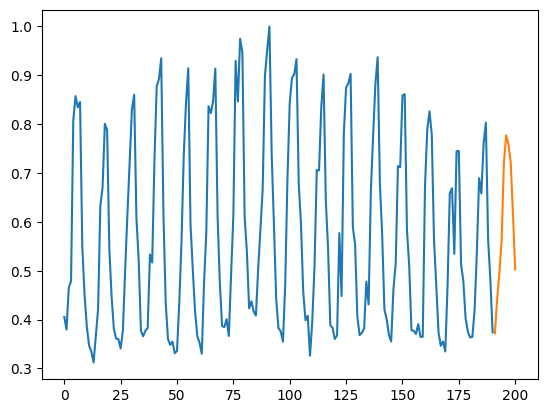

In [248]:
plt.plot(scaled)
plt.plot(np.arange(len(scaled), len(scaled) + len(_predictions)), _predictions, label="case 1")